In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


2023-05-08 21:34:06.225786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def load_vehicle_data(vehicles_path='data'):
  csv_path = os.path.join(vehicles_path, "project_data.csv")
  return pd.read_csv(csv_path)

vehicles = load_vehicle_data()
vehicles.head(5000)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
from util import load_preprocessed_data
from util import remove_vehicle_data_noise
from util import convert_categories_to_integers
from util import normalize_numerical_data_attributes

remove_vehicle_data_noise(vehicles)
converted_vehicles = convert_categories_to_integers(vehicles)
converted_vehicles.reset_index(inplace=True)
converted_vehicles.drop(['index'], axis=1, inplace= True)
normalize_numerical_data_attributes(converted_vehicles)

vehicles.head(5000)

,name,selling_price,fuel,seller_type,transmission,year,km_driven,owner
0,Maruti 800 AC,60000,0,0,0,-1.513495,0.112024,-0.644862
1,Maruti Wagon R LXI Minor,135000,0,0,0,-1.513495,-0.379909,-0.644862
2,Hyundai Verna 1.6 SX,600000,1,0,0,-0.267813,0.849923,-0.644862
3,Datsun RediGO T Option,250000,0,0,0,0.977870,-0.478295,-0.644862
4,Honda Amaze VX i-DTEC,450000,1,0,0,0.230460,1.858385,0.775833
...,...,...,...,...,...,...,...,...
4117,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,1,0,0,0.230460,0.357990,0.775833
4118,Hyundai i20 Magna 1.4 CRDi,409999,1,0,0,0.230460,0.357990,0.775833
4119,Maruti 800 AC BSIII,110000,0,0,0,-1.015222,0.431780,0.775833
4120,Hyundai Creta 1.6 CRDi SX Option,865000,1,0,0,0.728733,0.603956,-0.644862


In [17]:
from sklearn.model_selection import train_test_split

X2 = vehicles[['year']]
y = vehicles['selling_price']

print(X2)
print(y)

          year
0    -1.513495
1    -1.513495
2    -0.267813
3     0.977870
4     0.230460
...        ...
4117  0.230460
4118  0.230460
4119 -1.015222
4120  0.728733
4121  0.728733

[4122 rows x 1 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4117    409999
4118    409999
4119    110000
4120    865000
4121    225000
Name: selling_price, Length: 4122, dtype: int64


In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.2, random_state=42)

### POLYNOMIAL REGRESSION

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x2_train_poly = poly.fit_transform(X2_train)
x2_test_poly = poly.transform(X2_test)
print(x2_test_poly)

[[ 0.97786998  0.9562297 ]
 [ 1.22700652  1.50554499]
 [ 1.22700652  1.50554499]
 ...
 [-0.51694925  0.26723653]
 [ 0.4795969   0.23001319]
 [ 1.22700652  1.50554499]]


In [21]:
model2 = LinearRegression()
model2.fit(x2_train_poly, y2_train)
y2_pred = model2.predict(x2_test_poly)

In [22]:
print('-------------------------')
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
n2 = len(y2_pred)
me2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('Mean Squared Error:', mse2)
print('R-squared:', r2_2)
print('mean absolute percentage error: ', me2)

-------------------------
Mean Squared Error: 55769474088.9046
R-squared: 0.34082498397922223
mean absolute percentage error:  0.5312984010706343


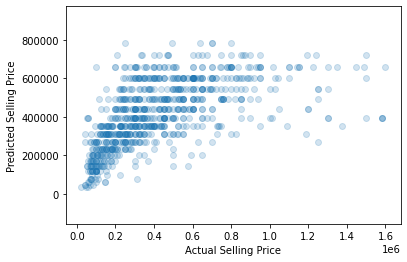

In [23]:
import matplotlib.pyplot as plt

# Plot the predicted selling prices versus the actual selling prices
plt.scatter(y2_test, y2_pred, alpha=0.2)
plt.axis('equal')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()